# Part 1 - Data Preparation and Preprocessing

In [2]:
# Imports
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

# Increase the width of the notebook for displaying DataFrames
display(HTML("<style>.container { width:75% !important; }</style>"))

C:\Users\Zac\AppData\Local\Temp\ipykernel_15616\1047861942.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### Load and visualise the dataset

In [3]:
# Low_memory=False allows pandas to get the true datatype for each column by looking through the whole dataset before assigning datatypes.
df = pd.read_csv("data.csv", low_memory=False)
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


## 1.2.Normalize and clean the data

### Calculate the avarage salary

In [4]:
# Create a new column for the average salary and visualise it
df = df.assign(AverageSalary = lambda row: (row.LowestSalary + row.HighestSalary) / 2)
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


### Clean ID column using regex

In [5]:
# Replace any id
df["Id"] = df["Id"].replace(to_replace=r'&.*', value='', regex=True)

### Clean date using regex

In [6]:
#Your code to clean date
df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)

### Change type of related columns

In [7]:
# Set column "Id" to type int64
df["Id"] = pd.to_numeric(df["Id"])

# Set column "Date" to type datetime64[ns]
df["Date"] = pd.to_datetime(df["Date"])
# Data types after data cleaning and conversions
df.dtypes

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
dtype: object

In [15]:
#Save the cleaned and preprocessed dataset
df.to_csv("preprocessed_data.csv")

# Part 1.2)
The first step to begin working with the data is to load it into a DataFrame using Pandas. Pandas is a flexible and powerful open-source data analytics tool, built for use in Python. To load the csv file into a DataFrame, just call read_csv with the filename. In this assignment, an optional parameter "low_memory=False" is also provided, to allow Pandas to use enough memory to determine the correct datatype for each column due to the size of the dataset. Without this parameter, Pandas will attempt to guess the datatypes, which may lead to unexpected results. To normalize the data, the average salary is calculated for all job entries, by taking the LowestSalaray and HighestSalary columns, and placed back into the DataFrame as a new column AverageSalary. This number is then multiplied by 1,000 and formatted for easier readabilitiy. This results in an average salary looking like "15,000" instead of "15.0". Normalizing the data this way provides each job entry with a fair visualisation of salary. 

The dataset also requires some cleaning for a couple of the columns. The "Id" column is how Seek keeps track of unique job entries and should be an integer number, but occasionally contains some random characters. To clean this up, a regular expression is used to remove any occurence of characters that occur after - and including - an ampersand. The "Date" column also contains extra information that is not necessary for this analysis. This column includes hours, minutes, and seconds, but only the day, month, and year are required. To clean this column, a regular expression is used to remove anything after and including a 'T' character. This results in the "Date" column only containing the necessary information in the format yyyy-mm-dd. After the data cleaning is complete, the correct dtypes are assigned to the "Id" and "Date" columns.

# Part 1.3)
One expected outcome of the data analysis is the number of jobs based on location. The expected result is that jobs will be concentrated on the coast, with the highest number seen in the five large cities of Australia. A similar outcome is expected for the salaries of jobs; the further South you go - Melbourne, Sydney, Adelaide - the higher paying jobs you can expect to find. This is due to a large population density and higher cost of living in the Southern cities of Australia.

# 1.3. Job metadata

In [8]:
colors = ['#1F77B4', '#AEC7E8', '#FF7F0E', '#BCBD22', '#FFBB78', '#2CA02C', '#98DF8A', '#B5CF6B', '#FF9896', '#9467BD', '#C5B0D5']

In [12]:
#Group by average salary and count the numbers
averageSalaryDf = df.groupby('AverageSalary').count()
averageSalaryDf['AverageSalary'] = (averageSalaryDf.index*1000).astype(float).map('{:,.0f}'.format)
averageSalaryDf['Count'] = averageSalaryDf["Id"]
averageSalaryDf

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Count
AverageSalary,,,,,,,,,,,,,,,
15.0,62639,62639,59611,62639,38541,24399,38541,38541,62637,56065,62639,62639,56080,"15,000",62639
35.0,23476,23476,22296,23476,16396,9811,16396,16396,23476,22092,23476,23476,22094,"35,000",23476
45.0,34436,34436,32076,34436,21736,13264,21736,21736,34435,33580,34436,34436,33585,"45,000",34436
55.0,27027,27027,25679,27027,16561,10755,16561,16561,27026,26206,27027,27027,26222,"55,000",27027
65.0,28499,28499,27290,28499,18121,11393,18121,18121,28499,27544,28499,28499,27566,"65,000",28499
75.0,28712,28712,27794,28712,17053,10456,17053,17053,28712,27670,28712,28712,27674,"75,000",28712
90.0,24249,24249,23625,24249,12701,7562,12701,12701,24248,23587,24249,24249,23590,"90,000",24249
110.0,27673,27673,27150,27673,17137,10575,17137,17137,27671,26682,27673,27673,26683,"110,000",27673
135.0,24514,24514,24165,24514,14701,9481,14701,14701,24514,23610,24514,24514,23612,"135,000",24514


### Bar chart to display the correlations between “AverageSalary” and the total jobs of each range (2 marks)

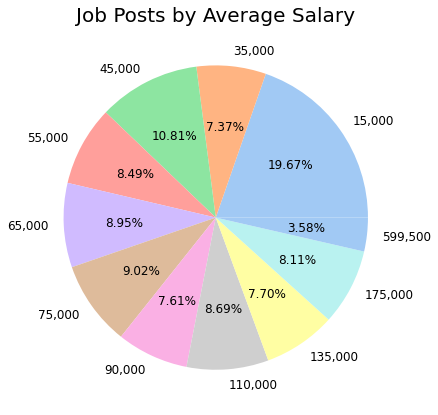

In [30]:
labels = averageSalaryDf["AverageSalary"]

colors = sns.color_palette('pastel')
fig = plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.pie(data=averageSalaryDf, x=averageSalaryDf.Count, labels=labels, colors=colors, autopct='%0.2f%%', textprops={'fontsize': 12})

plt.title("Job Posts by Average Salary", size=20);

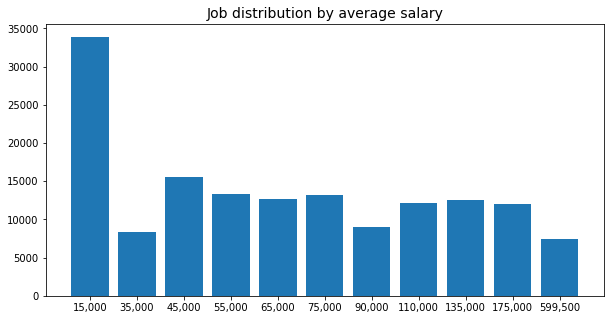

In [19]:
#Your code here

### Pie chart to display the relationship between job types and the number of jobs

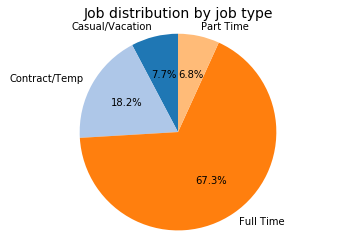

In [20]:
#Your code here

# Study market by locations

In [90]:
# Sort by the largest cities
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.sort_values("Count", ascending=False, inplace=True)
locationDf

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Location,Count
Location,,,,,,,,,,,,,,,
Sydney,60765,60765,58919,60765,53778,60765,60765,60765,57456,60765,60765,57470,60765,Sydney,60765
Melbourne,46690,46690,44941,46690,41297,46690,46690,46686,43821,46690,46690,43827,46690,Melbourne,46690
Brisbane,21466,21466,20612,21466,17412,21466,21466,21466,20214,21466,21466,20221,21466,Brisbane,21466
Perth,13198,13198,12766,13198,10171,13198,13198,13198,12287,13198,13198,12298,13198,Perth,13198
Adelaide,6653,6653,6303,6653,0,6653,6653,6653,6312,6653,6653,6313,6653,Adelaide,6653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yorke Peninsula & Clare Valley,96,96,94,96,0,96,96,96,90,96,96,90,96,Yorke Peninsula & Clare Valley,96
"Tumut, Snowy & Monaro",86,86,85,86,0,86,86,86,83,86,86,83,86,"Tumut, Snowy & Monaro",86
Somerset & Lockyer,65,65,63,65,0,65,65,65,64,65,65,64,65,Somerset & Lockyer,65


### Get top 20 big cities and use bar chart to display market size in each city (2 marks).

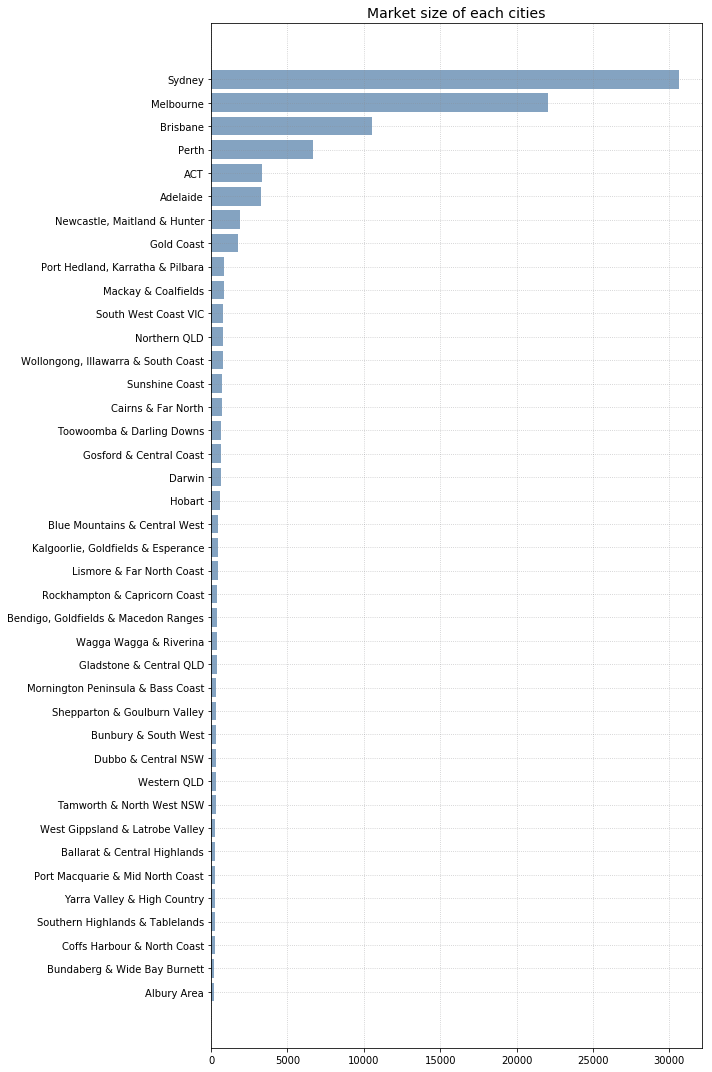

In [13]:
#Your code here

### Visualize the market share between the cities (2 marks)

In [14]:
#Get top 10 big cities
locationDf = locationDf.sort_values(by=["Count"], ascending =False)
locationTop10Df = locationDf[:10].copy()
#others
new_row = pd.DataFrame(data = {
    'Location' : ['Others'],
    'Count' : [locationDf["Count"][10:].sum()]
})
locationTop10Df = pd.concat([locationTop10Df, new_row],sort=False)
locationTop10Df.index = locationTop10Df['Location']

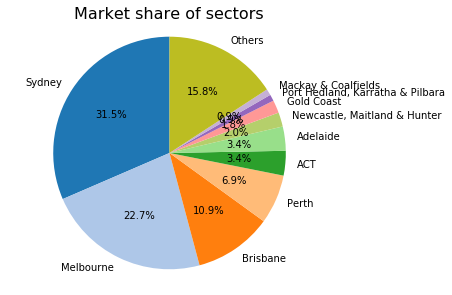

In [15]:
#Your code here

### Visualize the salary distribution in top biggest cities (2 marks)

In [91]:
#Your code here
testDf = df[df["Classification"] == "Information & Communication Technology"].groupby('SubClassification').count()
testDf[:5]

,Id,Title,Company,Date,Location,Area,Classification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
SubClassification,,,,,,,,,,,,,
Architects,1548,1548,1540,1548,1548,1053,1548,1548,1442,1548,1548,1442,1548
Business/Systems Analysts,2986,2986,2954,2986,2986,2097,2986,2986,2713,2986,2986,2713,2986
Computer Operators,13,13,13,13,13,5,13,13,13,13,13,13,13
Consultants,1149,1149,1133,1149,1149,790,1149,1149,1094,1149,1149,1094,1149
Database Development & Administration,551,551,546,551,551,392,551,551,490,551,551,490,551


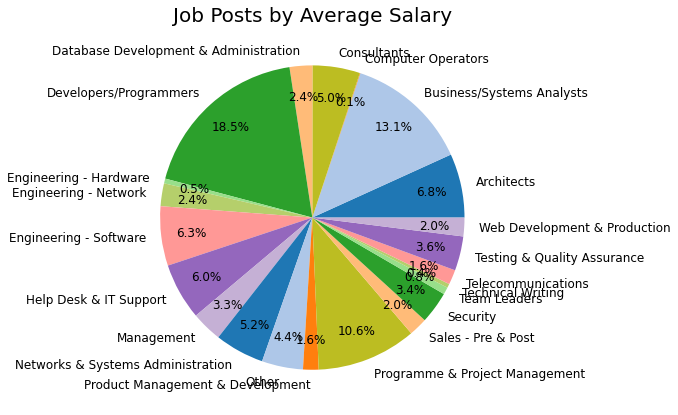

In [92]:


labels = testDf.index

fig = plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.pie(data=testDf, x=testDf.Id, labels=labels, colors=colors, autopct='%0.1f%%', textprops={'fontsize': 12}, pctdistance=0.8)

plt.title("Job Posts by Average Salary", size=20);

# 1.5 Study by sectors

### The number of postings for each sector. (2 marks)

In [94]:
#Your code here
classificationDf = df[df["Classification"].isna() == False]
classificationDf = classificationDf.groupby('Classification').count()
classificationDf["Classification"] = classificationDf.index
classificationDf["Count"] = classificationDf["Id"]
classificationDf.sort_values("Count", ascending=False, inplace=True)
classificationDf

,Id,Title,Company,Date,Location,Area,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Classification,Count
Classification,,,,,,,,,,,,,,,
Information & Communication Technology,22796,22796,22447,22796,22796,16090,22796,22796,21162,22796,22796,21163,22796,Information & Communication Technology,22796
Trades & Services,17976,17976,16500,17976,17976,9671,17976,17976,17125,17976,17976,17126,17976,Trades & Services,17976
Healthcare & Medical,17085,17085,16390,17085,17085,7961,17085,17085,16380,17085,17085,16383,17085,Healthcare & Medical,17085
Hospitality & Tourism,15523,15523,14890,15523,15523,9642,15523,15523,14294,15523,15523,14298,15523,Hospitality & Tourism,15523
"Manufacturing, Transport & Logistics",12376,12376,11465,12376,12376,8545,12376,12376,11752,12376,12376,11754,12376,"Manufacturing, Transport & Logistics",12376
Administration & Office Support,10020,10020,9534,10020,10020,6843,10020,10020,9215,10020,10020,9215,10020,Administration & Office Support,10020
Accounting,9368,9368,9056,9368,9368,7308,9368,9368,8760,9368,9368,8760,9368,Accounting,9368
Education & Training,9280,9280,9037,9280,9280,5868,9280,9280,8714,9280,9280,8718,9280,Education & Training,9280
Construction,8372,8372,8042,8372,8372,5057,8372,8372,8022,8372,8372,8023,8372,Construction,8372


### Find the main spotlight sub-sectors in each sector (1 mark)

In [96]:
# Pie char for job market share of classifications
from matplotlib import cm

df_pie = classificationDf['Classification'].groupby(classificationDf['Classification'])

df_pie = df_pie.count().sort_values(ascending=False).to_frame()
df_pie['Value'] = df_pie["Classification"]
df_pie['Classification'] = df_pie.index
df2 = df_pie[:10].copy()
new_row = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'Value' : [df_pie["Value"][10:].sum()]
})

df2 = pd.concat([df2, new_row])
df2.index = df2['Classification']


#your code here

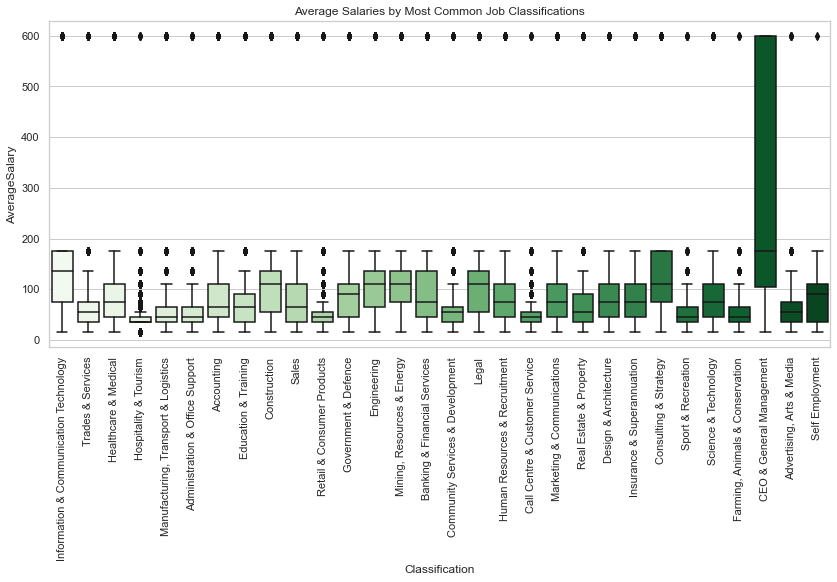

In [108]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="Classification", y="AverageSalary", order=classificationDf["Classification"], palette=sns.color_palette("Greens", n_colors=30))
sns.set()
sns.set_style("whitegrid")
plt.title("Average Salaries by Most Common Job Classifications")
plt.xticks(rotation=90)
plt.show()

### Visualize the salary range in the sectors/sub-sectors (1 mark)

In [ ]:
#your code here

# Part 3 - Evaluation

1)

2)

3)

4) There are various implications for both employers and employees based on the evidence found in this data. 